In [16]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import json
import matplotlib.pyplot as plt


In [26]:
tsla = yf.Ticker("TSLA")

tsla_data = tsla.history(period="max")

tsla_data.reset_index(inplace=True)
tsla_data.head()



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
url = "https://backlinko.com/tesla-stats#tesla-annual-revenue"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")



In [17]:
table = pd.read_html(response.text, attrs={'class':"table table-primary table-striped table-hover"})

tesla_annual_revenue = table[2]
tesla_annual_revenue.tail()

,Year,Annual revenue
9,2017,$11.76 billion
10,2018,$21.46 billion
11,2019,$24.58 billion
12,2020,$31.54 billion
13,2021 (Q1+Q2),$22.35 billion


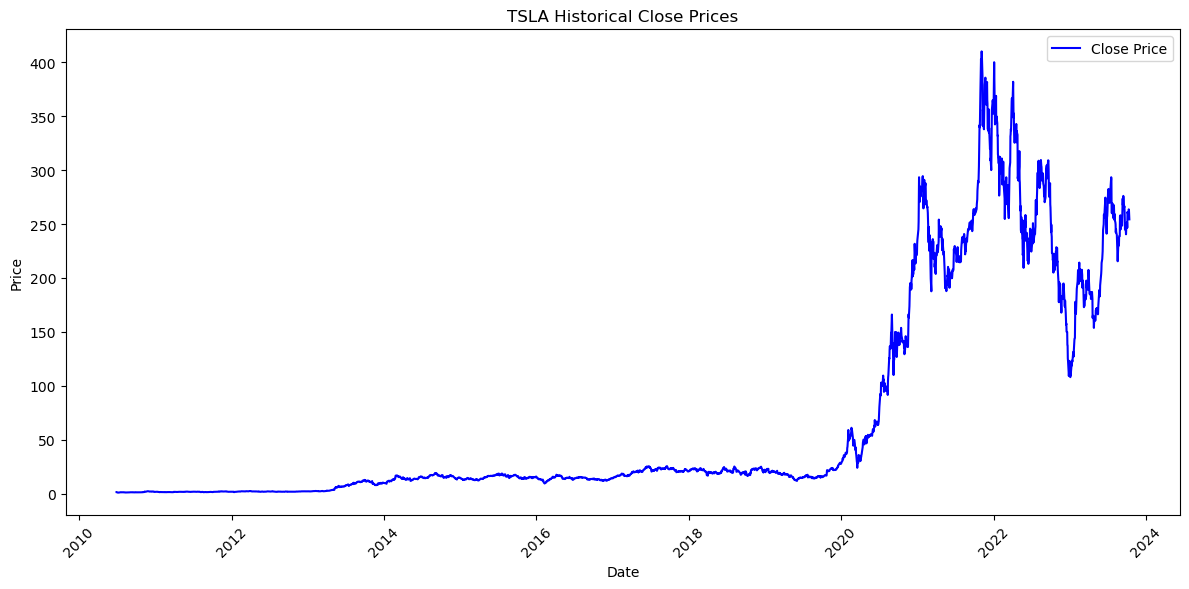

In [28]:
def make_graph(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='b')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('TSLA Historical Close Prices')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming tsla_data is already defined and contains historical data
make_graph(tsla_data)

In [30]:
gme = yf.Ticker("GME")

gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [13]:
gamestop_url = "https://companiesmarketcap.com/gamestop/revenue/#:~:text=According%20to%20GameStop%20's%20latest,sale%20of%20goods%20or%20services."
response2 = requests.get(gamestop_url)

table2 = pd.read_html(response2.text, attrs={'class':"table"})

gamestop_annual_revenue = table2[0]
gamestop_annual_revenue_year_revenue = gamestop_annual_revenue[['Year','Revenue']]
gamestop_annual_revenue_year_revenue

,Year,Revenue
17,2006,$4.68 B
18,2005,$2.13 B
19,2004,$1.75 B
20,2003,$1.47 B
21,2002,$1.34 B


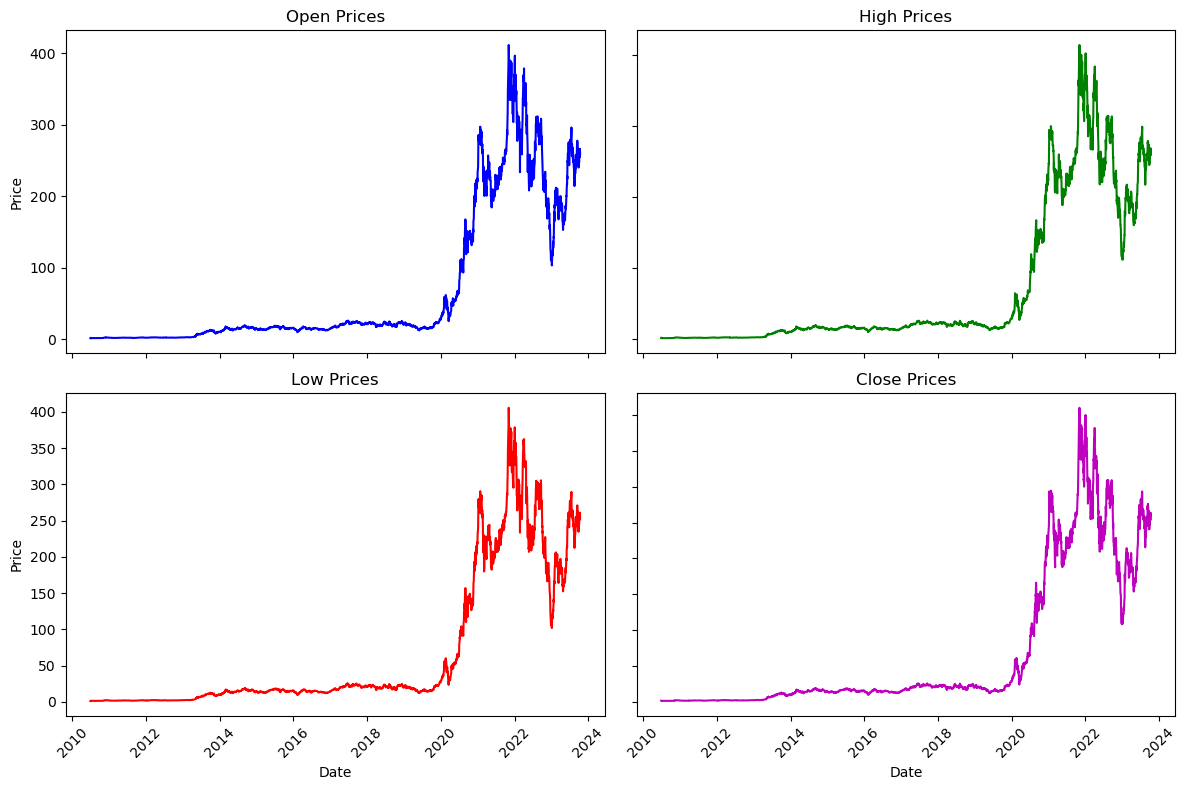

In [31]:
dates = tsla_data['Date']
open_prices = tsla_data['Open']
high_prices = tsla_data['High']
low_prices = tsla_data['Low']
close_prices = tsla_data['Close']
volume = tsla_data['Volume']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot open prices
axs[0, 0].plot(dates, open_prices, color='b')
axs[0, 0].set_title('Open Prices')

# Plot high prices
axs[0, 1].plot(dates, high_prices, color='g')
axs[0, 1].set_title('High Prices')

# Plot low prices
axs[1, 0].plot(dates, low_prices, color='r')
axs[1, 0].set_title('Low Prices')

# Plot close prices
axs[1, 1].plot(dates, close_prices, color='m')
axs[1, 1].set_title('Close Prices')

# Set common labels
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Price')

# Rotate x-axis labels for better visibility
for ax in axs.flat:
    ax.label_outer()
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

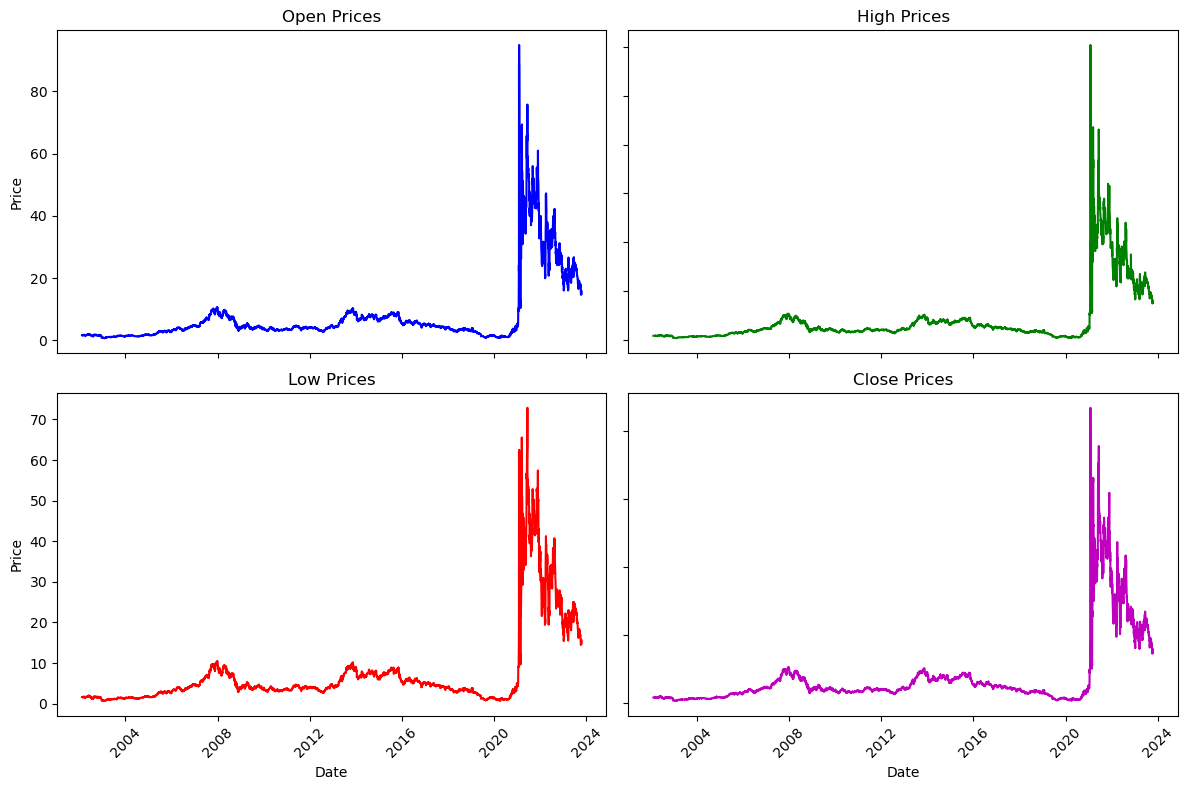

In [32]:
dates2 = gme_data['Date']
open_prices2 = gme_data['Open']
high_prices2 = gme_data['High']
low_prices2 = gme_data['Low']
close_prices2 = gme_data['Close']
volume2 = gme_data['Volume']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot open prices
axs[0, 0].plot(dates2, open_prices2, color='b')
axs[0, 0].set_title('Open Prices')

# Plot high prices
axs[0, 1].plot(dates2, high_prices2, color='g')
axs[0, 1].set_title('High Prices')

# Plot low prices
axs[1, 0].plot(dates2, low_prices2, color='r')
axs[1, 0].set_title('Low Prices')

# Plot close prices
axs[1, 1].plot(dates2, close_prices2, color='m')
axs[1, 1].set_title('Close Prices')

# Set common labels
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Price')

# Rotate x-axis labels for better visibility
for ax in axs.flat:
    ax.label_outer()
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()